>Никита, приветствую! Меня зовут Кудрявцев Александр и я буду проверять твой проект.
>
>Если ты непротив, мне было бы удобнее общаться на "ты" во время проверки проекта :)
>
>Ниже в ноутбуке будут мои комментарии, закодированные разными цветами.
>
>**<span style="color:green">Зеленым будут выделены места, которые хочется особенно отметить, как хорошие. </span>**
>
>**<span style="color:red">Недочеты, откомментированные красным обязательны к доработке – без их исправления проект не будет зачтен. </span>**
>  
> **<span style="color:orange">Недочеты и подсказки, откомментированные оранжевым, учесть желательно, но их доработка не является обязательным условнием для зачета.</span>**
>
> Если какие-то подзадачи не откомментированны – значит с ними все окей, нет возражений.
>
> Если ошибка влечет за собой дальнейшие неточности рассчетов или выводов – пожалуйста, поправь их тоже, чтобы аналитический отчет был целостным.
>
>Предлагаю быть в диалоге, и, пожалуйста, не удаляй и не переноси мои комментарии, а также выделяй свои новые комментарии цветом (например, синим) — это позволит лучше ориентироваться при возможных повторных проверках.

# Описание проекта
Вас пригласили на стажировку в отдел маркетинговой аналитики Яндекс.Афиши. Первое задание: помочь маркетологам снизить расходы — отказаться от невыгодных источников трафика и перераспределить бюджет.
1. Есть данные Яндекс.Афиши с июня 2017 по конец мая 2018 года:
    * лог сервера с данными о посещениях сайта Яндекс.Афиши,
    * выгрузка всех заказов за этот период,
    * статистика рекламных расходов.
2. Вам предстоит изучить:
    * как клиенты пользуются сервисом,
    * когда делают первые покупки на сайте,
    * сколько денег приносит компании каждый клиент,
    * когда расходы на привлечение клиента окупаются.
    * Выручка измеряется в условных единицах — у.е.

# Оглавление
1. [Изучение данных из файла](#start)
    1. [Вывод](#conclusion1)
2. [Предобработка данных](#preprocessing)
    1. [Вывод](#conclusion2)
3. [Анализ данных](#data_analysis)
3. [Общий вывод](#conclusion) 

>**<span style="color:green">Интерактивное оглавление в проектах `jupyter notebook` и подробное описание работы — отличная практика. Так держать! ;)</span>**


## Изучение данных из файла
<a id="start"></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sbs
import matplotlib.pyplot as plt
import warnings
%matplotlib inline

In [2]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) # для нормального отображение вещественных чисел

In [3]:
try:
    visits = pd.read_csv('/datasets/visits_log.csv')
    orders = pd.read_csv('/datasets/orders_log.csv')
    costs = pd.read_csv('/datasets/costs.csv')
except:
    visits = pd.read_csv('/Users/nikitagudilin/Desktop/YANDEX_PRAKTIKUM/PROJECTS/M2/project2/visits_log.csv')
    orders = pd.read_csv('/Users/nikitagudilin/Desktop/YANDEX_PRAKTIKUM/PROJECTS/M2/project2/orders_log.csv')
    costs = pd.read_csv('/Users/nikitagudilin/Desktop/YANDEX_PRAKTIKUM/PROJECTS/M2/project2/costs.csv')

**Посмотрим на таблицы**

In [4]:
visits.sample(20, random_state=0)

,Device,End Ts,Source Id,Start Ts,Uid
322134,desktop,2017-10-21 11:21:00,5,2017-10-21 11:21:00,13710189337090708728
230055,desktop,2017-10-27 21:10:00,5,2017-10-27 21:08:00,11789034634171541792
308855,desktop,2018-01-01 23:07:00,5,2018-01-01 23:01:00,10536989898042665193
159103,desktop,2018-02-08 03:34:00,10,2018-02-08 03:31:00,16198058345707165979
211615,desktop,2017-12-16 23:54:00,4,2017-12-16 23:52:00,1282737608678022038
171006,touch,2018-03-25 17:43:00,3,2018-03-25 17:42:00,71753050216985453
271735,desktop,2018-05-18 08:19:00,3,2018-05-18 07:47:00,6083468964804878409
42520,desktop,2018-01-27 15:16:00,4,2018-01-27 15:15:00,16618305380178740969
44450,touch,2018-01-04 15:11:00,3,2018-01-04 15:09:00,11572008886732288794
17475,touch,2017-07-15 14:50:00,4,2017-07-15 14:27:00,13319411845571952914


In [5]:
orders.sample(20, random_state=0)

,Buy Ts,Revenue,Uid
14764,2017-10-26 21:12:00,0.780,3936213438627212459
12203,2017-10-11 16:06:00,4.280,10116135452198588850
7441,2017-09-11 10:17:00,5.500,3741455384142924169
37498,2018-03-01 10:58:00,3.120,6948781160947906362
46560,2018-05-07 09:39:00,36.670,16133872958172068916
33494,2018-02-07 23:35:00,0.980,7454870061406616263
20286,2017-11-26 15:20:00,0.610,6417355677139376987
20890,2017-11-29 12:12:00,3.050,7601160391933962090
37546,2018-03-01 14:20:00,4.280,14488607065096560816
12115,2017-10-11 10:01:00,1.590,1979244080388843539


In [6]:
costs.sample(20, random_state=0)

,source_id,dt,costs
2061,9,2018-02-01,27.780
480,2,2017-09-26,109.950
2043,9,2018-01-14,15.180
883,3,2017-11-05,363.830
2449,10,2018-02-26,17.790
1666,5,2018-01-01,149.290
2447,10,2018-02-24,2.570
1127,4,2017-07-09,51.910
536,2,2017-11-21,167.370
2093,9,2018-03-05,12.260


**Выведем общую информацию**

In [7]:
lst_df = [visits, orders, costs]
print('\tОбщая информация')
for obj in lst_df:
    obj.info()
    print('-'*40) 

	Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
-------

**Выведем статистическую информацию**

In [8]:
print('\tCтатистическая информация')
for obj in lst_df:
    print(obj.describe())
    print('-'*40) 

	Cтатистическая информация
       Source Id                      Uid
count 359400.000               359400.000
mean       3.751  9202556994354921472.000
std        1.917  5298432824659611648.000
min        1.000       11863502262781.000
25%        3.000  4613406732167550976.000
50%        4.000  9227412908740601856.000
75%        5.000 13728237011236173824.000
max       10.000 18446676030785673216.000
----------------------------------------
        Revenue                      Uid
count 50415.000                50415.000
mean      5.000  9098160634289729536.000
std      21.818  5285741550834715648.000
min       0.000      313578113262317.000
25%       1.220  4533566627250599936.000
50%       2.500  9102273602618561536.000
75%       4.890 13682901980465401856.000
max    2633.280 18446167067214817280.000
----------------------------------------
       source_id    costs
count   2542.000 2542.000
mean       4.857  129.477
std        3.182  156.297
min        1.000    0.540
25%        2.0

**Посмотрим на дублированные записи**

In [9]:
print('\tДублированные записи?')
for obj in lst_df:
    print(obj.duplicated().sum())
    print('-'*40) 

	Дублированные записи?
0
----------------------------------------
0
----------------------------------------
0
----------------------------------------


**Узнаем, присутсвуют ли пропущенные записи**

In [10]:
print('\tПропущенные записи?')
for obj in lst_df:
    print(obj.isna().sum())
    print('-'*40) 

	Пропущенные записи?
Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64
----------------------------------------
Buy Ts     0
Revenue    0
Uid        0
dtype: int64
----------------------------------------
source_id    0
dt           0
costs        0
dtype: int64
----------------------------------------


**Построим диаграмму размаха для понимания расположения данных и для ознакомления с выбросами**

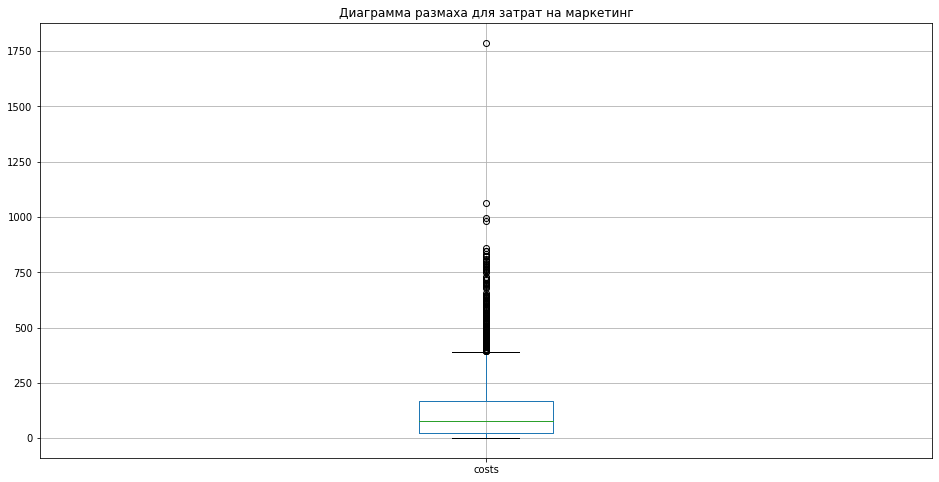

In [11]:
costs['costs'].plot(kind='box', title='Диаграмма размаха для затрат на маркетинг', 
                     figsize=(16, 8), grid=True)

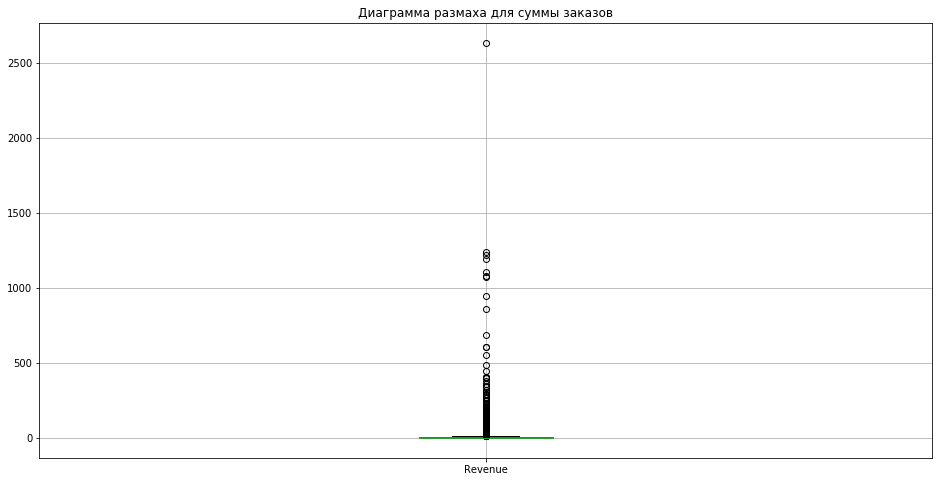

In [12]:
orders['Revenue'].plot(kind='box', title='Диаграмма размаха для суммы заказов', 
                     figsize=(16, 8), grid=True)

**Посмотрим на распределения данных**

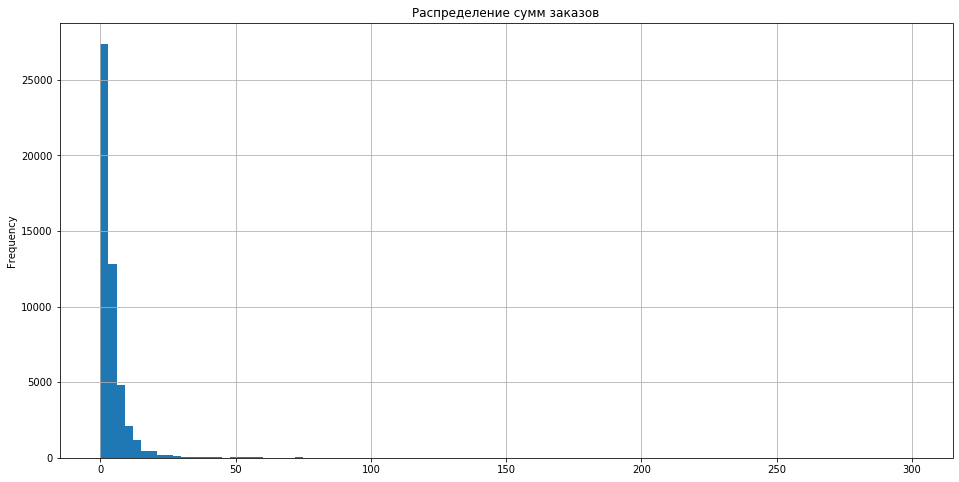

In [13]:
orders['Revenue'].plot(kind='hist', title='Распределение сумм заказов', bins=100, range=(0,300),
                     figsize=(16, 8), grid=True)

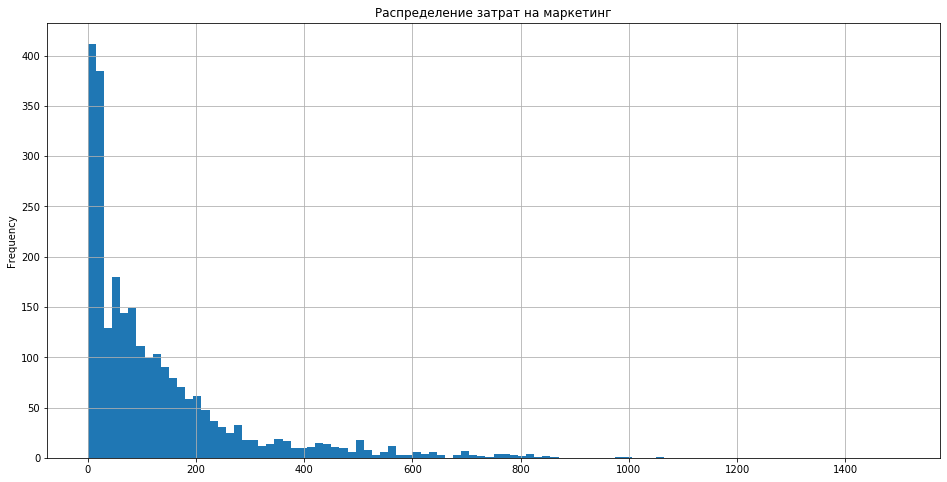

In [14]:
costs['costs'].plot(kind='hist', title='Распределение затрат на маркетинг', bins=100, range=(0,1500),
                     figsize=(16, 8), grid=True)

In [15]:
visits['Device'].value_counts()

desktop    262567
touch       96833
Name: Device, dtype: int64

In [16]:
visits['Source Id'].value_counts()

4     101794
3      85610
5      66905
2      47626
1      34121
9      13277
10     10025
7         36
6          6
Name: Source Id, dtype: int64

In [17]:
costs['source_id'].value_counts()

5     364
9     363
3     363
1     363
10    363
4     363
2     363
Name: source_id, dtype: int64

###  Вывод
<a id="conclusion1"></a>

1. Необходимо привести к datetime visits[End Ts], visits[Start Ts], orders[Buy Ts], costs[dt]
2. Основываясь на распределнии orders['Revenue'] стоит рассчитать моду
3. У costs[costs] и orders[revenue] mean > median примерно в 2 раза, а также boxplot с выбросами 
4. Нет дублированных и пропущенных записей
5. Следует изменить названия столбцов в costs, visits, orders
6. Использование desktop в примерно в 2,7 раза, чем touch

>**<span style="color:green">Здесь всё структурировано и по делу, класс. Очень здорово, что ты умело пользуешься циклами для   для автоматизации процесса знакомства с данными — это очень сильно повышает читаемость твоего кода и экономит тебе самому массу времени.</span>**
>
>**<span style="color:orange">~~В качестве небольшого дополнения, я бы рекомендовал тебе еще проверять диапазоны дат на соответствие заявленному периоду. Это важно поскольку мы собираемся считать в том числе денежные метрики и лучше уже на берегу убедиться что в наших исходных данных всё хорошо.~~</span>**

>>**<span style="color:green">Update: увидел проверку дат ниже, молодец!</span>**

>**<span style="color:red">При этом не забывай, пожалуйста, про офомление графиков. Это замечание касается всех визуализаций в твоей работе: нужно добавить заголовки и подписи осей (желательно с указанием единиц измерения).</span>**

**<span style="color:blue"> Оформил графики выше и ниже </span>**

## Предобработка данных
<a id="preprocessing"></a> 

**Исправили названия столбцов**

In [18]:
costs.columns = ['source_id', 'date', 'costs']

In [19]:
visits.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid']

In [20]:
orders.columns = ['date', 'revenue', 'uid']

>**<span style="color:orange">Очень здорово, что ты привёл названия колонок к нормальному виду, но при твоем подходе мы неявно учитываем порядок столбцов в изначальных датасетах. Поэтому в случае если в исходных данных что-либо поменяется мы можем допустить обидную ошибку. Чтобы подстраховаться, лучше использовать явно переименовывать конкретные столбцы, или применять исправления сразу ко всем наименованиям столбцов (ниже оставлю варианты кода). </span>**

In [21]:
### Код ревьювера ###

#costs = costs.rename(rename={'Source Id':'source_id'}) # функция rename
#costs.columns = costs.columns.str.lower().replace(' ', '_') 
#costs.columns = [x.lower().replace(' ', '_') for x in costs.columns] #list comprehensions

**<span style="color:blue"> Исправил названия явно ниже</span>**

In [22]:
costs = costs.rename(columns={'dt':'date'}) # функцией rename
visits.columns = visits.columns.str.lower().str.strip().str.replace(' ', '_')  # функциями строк + применил strip
orders = orders.rename(columns={'Buy Ts':'date'}) # функцией rename
orders.columns = orders.columns.str.lower().str.strip().str.replace(' ', '_') # функциями строк + применил strip

**Приведем к datetime visits[End Ts], visits[Start Ts], orders[Buy Ts], costs[dt]**

In [23]:
visits['end_ts'] = pd.to_datetime(visits['end_ts'])
visits['start_ts'] = pd.to_datetime(visits['start_ts'])
orders['date'] = pd.to_datetime(orders['date'])
costs['date'] = pd.to_datetime(costs['date'])

**Рассчитаем моду для orders['Revenue']**

In [24]:
orders['revenue'].mode()

0   1.830
dtype: float64

**Поскольку есть данные Яндекс.Афиши с июня 2017 по конец мая 2018 года и столбцы уже приведены к нужному типу, проверим, не выходят ли даты за рамки**

In [25]:
visits.query('end_ts >= "2018-06-01"').count()

device       12
end_ts       12
source_id    12
start_ts     12
uid          12
dtype: int64

In [26]:
visits.query('start_ts >= "2018-06-01"').count()

device       0
end_ts       0
source_id    0
start_ts     0
uid          0
dtype: int64

In [27]:
visits.query('start_ts >= "2018-06-01"').count()

device       0
end_ts       0
source_id    0
start_ts     0
uid          0
dtype: int64

In [28]:
orders.query('date >= "2018-06-01"').count()

date       1
revenue    1
uid        1
dtype: int64

In [29]:
costs.query('date >= "2018-06-01"').count()

source_id    0
date         0
costs        0
dtype: int64

### Вывод
<a id="conclusion2"></a>
1. Исправили названия столбцов 
2. Привели к datetime visits[End Ts], visits[Start Ts], orders[Buy Ts], costs[dt]
3. Рассчитали моду для orders['Revenue']
4. Выяснили, что visits[end_ts] и orders[date] выходят за промежуток (с июня 2017 по конец мая 2018 года ), а остальные даты нет, исправим это ниже

>**<span style="color:green">Здесь все окей, молодец!</span>**


## Анализ данных
<a id="data_analysis"></a>

In [30]:
visits = visits.query('end_ts < "2018-06-01"') 
orders = orders.query('date < "2018-06-01"')

**Посчитаем метрики трёх видов:**
1. продуктовые
2. метрики электронной коммерции
3. маркетинговые

### **Продуктовые**

*Файл visits_log.csv хранит лог сервера с информацией о посещениях сайта*

**1. Рассчитаем DAU, WAU и MAU. Вычислим средние значения этих метрик за весь период. Отобразим изменения метрик во времени на графиках**

In [31]:
visits['session_year'] = visits['start_ts'].dt.year # Выделим из даты год, месяц, неделю и полную дату
visits['session_month'] = visits['start_ts'].dt.month
visits['session_week'] = visits['start_ts'].dt.week
visits['session_date'] = visits['start_ts'].dt.date

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

>**<span style="color:green">Чтобы отключить эти уведомления можно использовать конструкцию ниже.</span>**

>**<span style="color:orange">В этом датасете вычисление номера недели/месяца может ввести в заблуждение, т.к. июнь 2018 будет идти сразу после мая 2017. А если бы в датасете были данные за несколько лет - такой подход привел бы к критическим ошибкам, т.к. месяцы разных лет были бы объедененны в один. Советую тебе использовать методы `astype('datetime64[M]') / astype('datetime64[W]'`</span>**

**<span style="color:blue"> Использовал astype для  номера недели/месяца ниже, а также убрал warnings </span>**

In [32]:
warnings.filterwarnings("ignore")
visits['session_year'] = visits['start_ts'].dt.year  # Выделим из даты год, месяц, неделю и полную дату
visits['session_month'] = visits['start_ts'].astype('datetime64[M]')
visits['session_week'] = visits['start_ts'].astype('datetime64[W]')
visits['session_date'] = visits['start_ts'].dt.date

In [33]:
dau = visits.groupby('session_date').agg({'uid':'nunique'})
dau_mean = dau.mean() # Рассчитаем DAU и вычислим среднее значение метрики за весь период
int(round(dau_mean))

908

In [34]:
wau = visits.groupby(['session_year', 'session_week']).agg({'uid':'nunique'})
wau_mean = wau.mean() # Рассчитаем WAU и вычислим среднее значение метрики за весь период
int(round(wau_mean))

5622

In [35]:
mau = visits.groupby(['session_year', 'session_month']).agg({'uid':'nunique'})
mau_mean = mau.mean() # Рассчитаем MAU и вычислим среднее значение метрики за весь период
int(round(mau_mean))

23228

**Отобразим изменения метрик во времени на графиках**

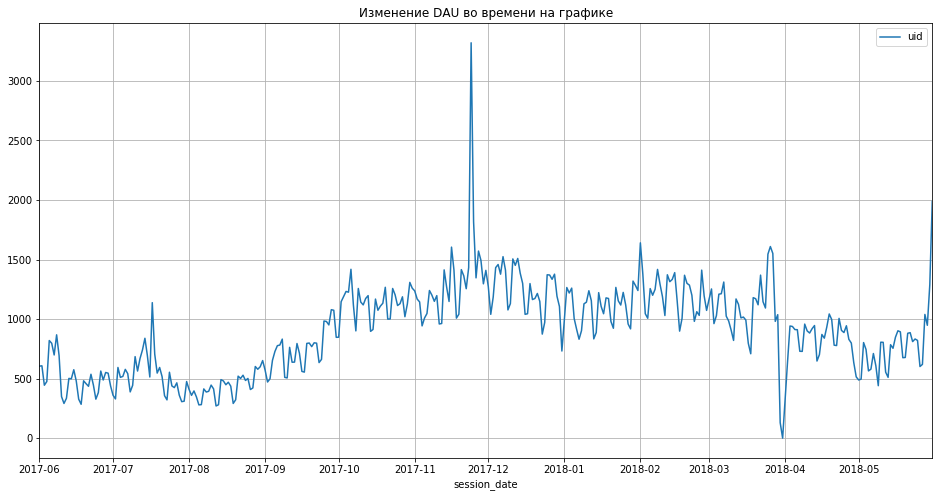

In [36]:
dau.plot(grid=True, figsize=(16,8)) 
plt.title("Изменение DAU во времени на графике")
plt.legend()

In [37]:
date = pd.to_datetime('2017-10-01')
dau1 = visits.query('session_date < @date').groupby('session_date').agg({'uid':'nunique'}).mean() 
int(round(dau1))

553

In [38]:
date1 = pd.to_datetime('2017-10-01')
date2 = pd.to_datetime('2018-04-01')
dau2 = visits.query('@date1 < session_date < @date2').groupby('session_date').agg({'uid':'nunique'}).mean() 
int(round(dau2))

1179

In [39]:
date1 = pd.to_datetime('2018-04-01')
dau3 = visits.query('@date1 < session_date ').groupby('session_date').agg({'uid':'nunique'}).mean() 
int(round(dau3))

815

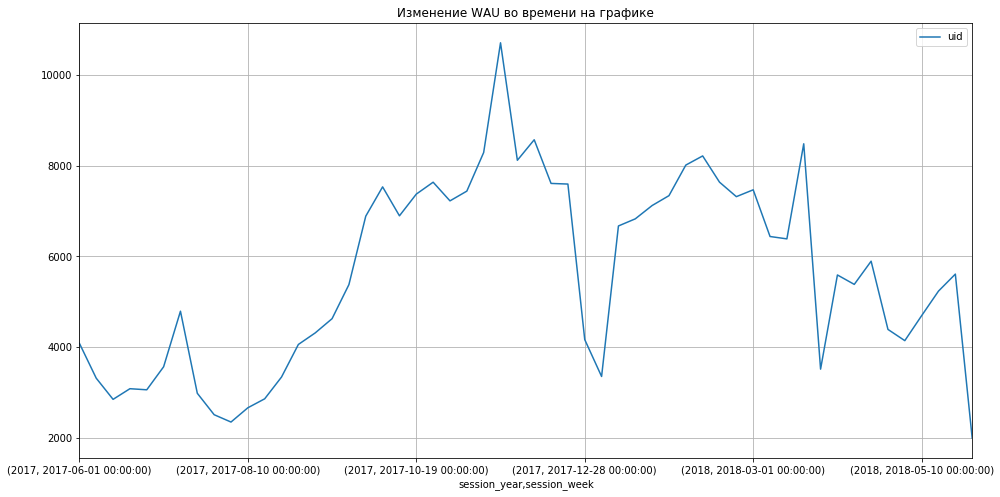

In [40]:
wau.plot(grid=True, figsize=(16,8))
plt.title("Изменение WAU во времени на графике")
plt.legend()

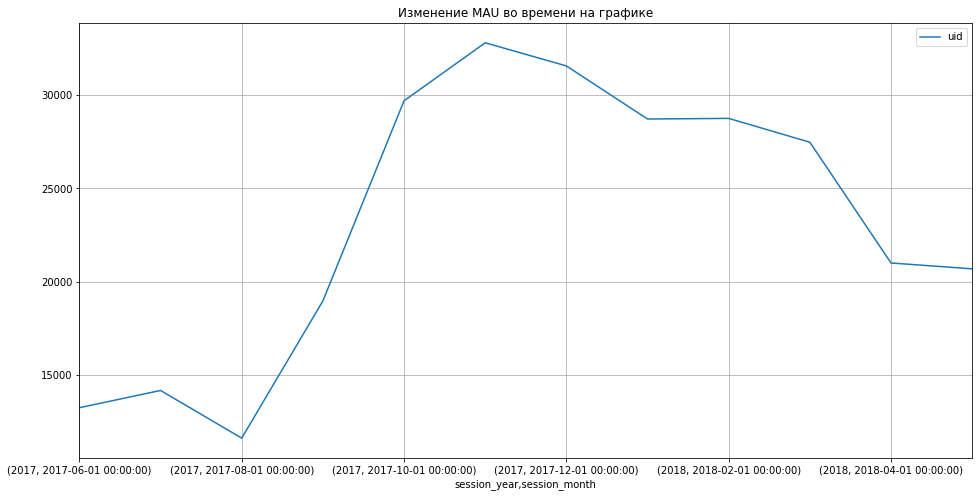

In [41]:
mau.plot(grid=True, figsize=(16,8))
plt.title("Изменение MAU во времени на графике")
plt.legend()

**ВЫВОДЫ**

1. На графиках DAU и WAU заметна одна и та же вершина по дате 2017-47 (week) или 2017-11-24 (date), также на графике DAU заметно падение по дате 2018-04, которое не отразилось на WAU
2. В свою очередь можно выделить 3 периода в DAU по количеству пользователей:
    * 1: 2017-06 по 2017-10 mean = 553; 
    * 2: 2017-10 по 2018-04 mean = 1179; 
    * 3: 2018-04 по 2018-05 mean = 815
4. На графике WAU заметен стабильный рост с 2017-08 по 2017-12, а также график более сглаженный чем графики DAU и WAU
5. MAU видна та самая вершина из DAU и WAU, которая является максимальной точкой на графике
6. DAU=908 MAU=5716 WAU=23228

>**<span style="color:green">По расчётам этих метрик у тебя все отлично, отдельно отмечу твою уверенную работу с графиками — получилось очень наглядно, молодец!</span>**

**2. Определим, сколько раз за день пользователи в среднем заходят на сайт. Построим график, отражающий изменения метрики во времени**

In [42]:
sessions = visits.groupby('session_date').agg({'uid':['count', 'nunique']})
sessions.columns = ['c_sessions', 'n_users']

In [43]:
sessions['session_per_user'] = sessions['c_sessions'] / sessions['n_users']
sessions_mean = sessions['session_per_user'].mean() 
sessions_mean # Определим, сколько раз за день пользователи в среднем заходят на сайт

1.0821671112951867

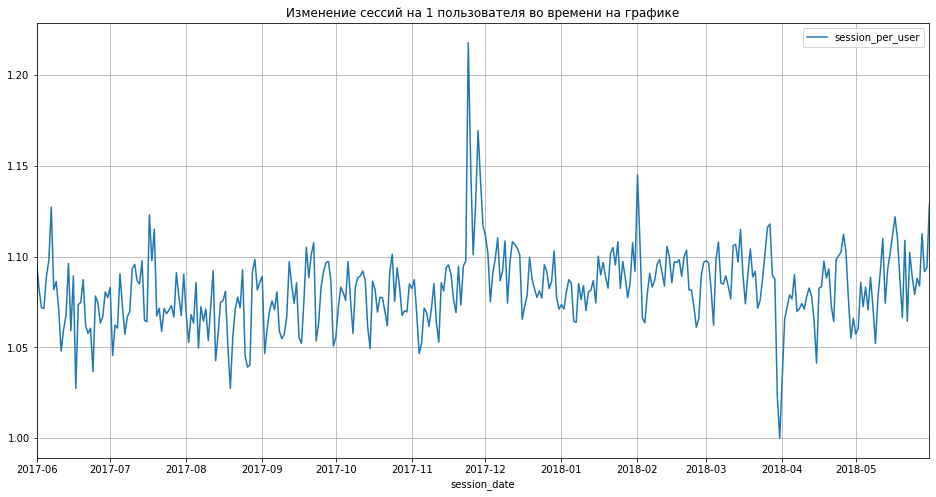

In [44]:
sessions['session_per_user'].plot(grid=True, figsize=(16,8))
plt.title("Изменение сессий на 1 пользователя во времени на графике")
plt.legend()

In [45]:
#Теперь удалим лишние столбцы
try: 
    visits = visits.drop(['session_year', 'session_month', 'session_week', 'session_date'], 1)
except:
    print('Уже удалены')

**ВЫВОДЫ**

1. Пользователи в среднем заходят на сайт 1 раз в день
2. Прослеживается тенденция из графика DAU на 2017-11-24

>**<span style="color:green">По этому блоку тоже все хорошо.</span>**

**3. Исследуем, сколько времени пользователи проводят на сайте. Узнаем продолжительность типичной пользовательской сессии за весь период. Чтобы выбрать подходящую среднюю меру, построим график распределения. Изменение продолжительности сессий во времени изучать необязательно**

In [46]:
visits['duration'] = (visits['end_ts'] - visits['start_ts']).dt.seconds # длительность сессии в секундах 

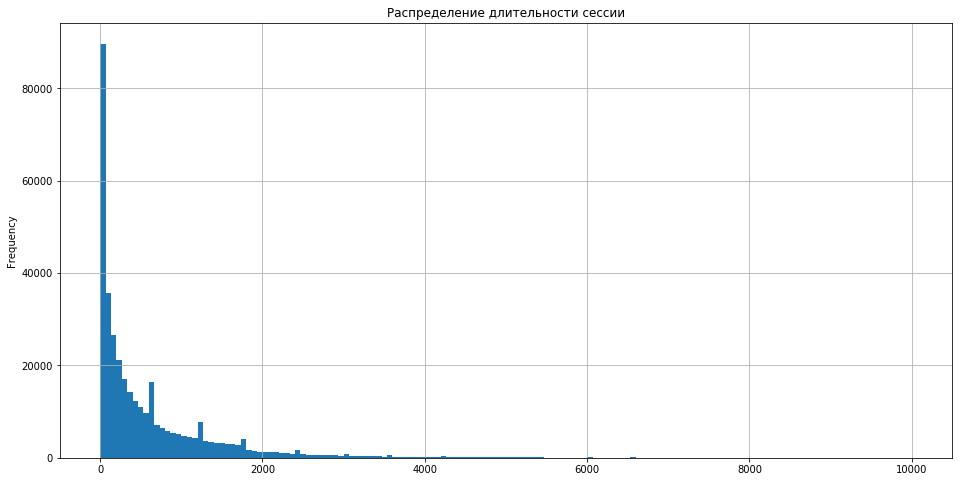

In [47]:
visits['duration'].plot(kind='hist', grid=True, figsize=(16,8), title='Распределение длительности сессии',
                        bins=150, range=(0, 10000)) 
# построим график распределения

In [48]:
asl = visits['duration'].mode() # распределение не является нормальным, значит возьмем моду 
asl

0    60
dtype: int64

**ВЫВОДЫ**

1. ASL = 60 секунд

>**<span style="color:green">Очень здорово, что ты проанализировал наше распределение и учёл его особенности при выборе меры центральной тенденции для наших данных.</span>**

>**<span style="color:red">Но не забываем про оформление графиков :)</span>**

**<span style="color:blue"> Подписал график выше </span>**

**4. Рассчитаем Retention Rate, применяя когортный анализ. Отобразим изменения метрики во времени на графике. Найдем средний Retention Rate на второй месяц «жизни» когорт.**

In [49]:
first_visit_date = visits.groupby('uid')['start_ts'].min() # найдем дату первого действия 
first_visit_date.name = 'first_visit_date'

In [50]:
visits = visits.merge(first_visit_date, on='uid') # объединим

In [51]:
visits['first_visit_month'] = visits['first_visit_date'].astype('datetime64[M]') # приведем дату к типу datetime64[M] для
visits['start_ts_month'] = visits['start_ts'].astype('datetime64[M]') # группировки по месяцам

In [52]:
cohorts = visits.groupby(['first_visit_month', 'start_ts_month']).agg({'uid': 'nunique'})
cohorts # построим когорты и посчитаем кол-во пользователей 

uid
first_visit_month start_ts_month       
2017-06-01        2017-06-01      13259
                  2017-07-01       1043
                  2017-08-01        713
                  2017-09-01        814
                  2017-10-01        909
...                                 ...
2018-03-01        2018-04-01        861
                  2018-05-01        557
2018-04-01        2018-04-01      15709
                  2018-05-01        760
2018-05-01        2018-05-01      15266

[78 rows x 1 columns]

In [53]:
try:
    cohorts = cohorts.reset_index()
except ValueError:
    pass

In [54]:
# Рассчитаем lifetime  
cohorts['cohort_lifetime'] = (cohorts['start_ts_month'] - cohorts['first_visit_month']) / np.timedelta64(1, 'M')
cohorts['cohort_lifetime'] = cohorts['cohort_lifetime'].round().astype('int')
cohorts['first_visit_month'] = cohorts['first_visit_month'].dt.strftime('%Y-%m') 

In [55]:
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_visit_month', 'uid']]
initial_users_count.columns = ['first_visit_month', 'initial_users_count']
cohorts = cohorts.merge(initial_users_count)

In [56]:
cohorts['retention'] = cohorts['uid'] / cohorts['initial_users_count'] # Посчитаем Retention

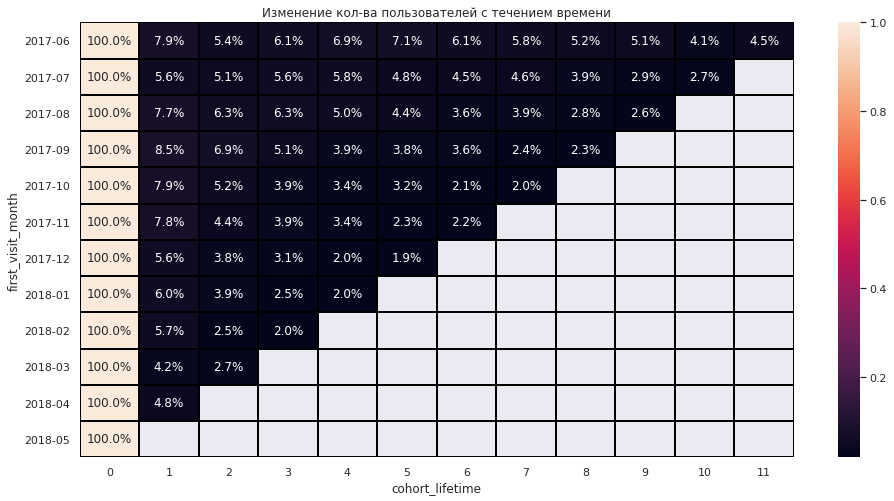

In [57]:
cohorts_pivot_table = cohorts.pivot_table(index='first_visit_month', 
                                      columns='cohort_lifetime', values='retention', aggfunc='sum') 
sbs.set(style='dark')
plt.figure(figsize=(16, 8))
plt.title('Изменение кол-ва пользователей с течением времени')
sbs.heatmap(
    cohorts_pivot_table,
    annot=True, 
    fmt='.1%',
    linewidths=1,
    linecolor='black'
)

In [58]:
cohorts_rr_mean = cohorts_pivot_table[2].mean()*100
cohorts_rr_mean
# Найдем средний Retention Rate на второй месяц «жизни» когорт 

4.63326221636773

In [59]:
np.mean(list(cohorts_pivot_table.mean()*100)[1:]) # средний Retention Rate по всем месяцам «жизни» когорт 

4.167273087332412

**<span style="color:blue"> Поправил vmax = 0.1 ниже </span>**

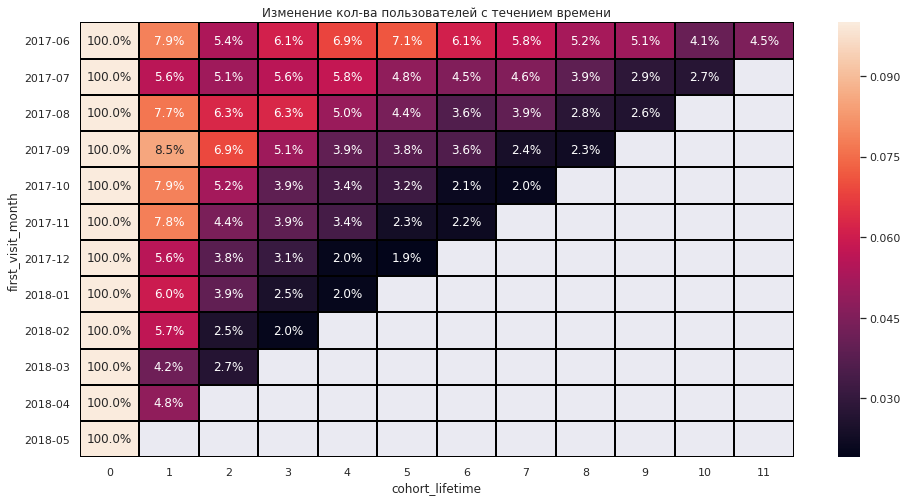

In [60]:
sbs.set(style='dark')
plt.figure(figsize=(16, 8))
plt.title('Изменение кол-ва пользователей с течением времени')
sbs.heatmap(
    cohorts_pivot_table,
    annot=True, 
    fmt='.1%',
    linewidths=1,
    linecolor='black',
    vmax = 0.1
)

In [61]:
#Теперь удалим лишние столбцы
try: 
    visits = visits.drop(['start_ts_month', 'first_visit_month', 'duration'], 1)
except:
    print('Уже удалены')

**ВЫВОДЫ**

1. Cредний Retention Rate на второй месяц «жизни» когорт = 4.63%
2. Основываясь на таблице с Retention Rate, можно прийти к выводу, что в среднем он держится на уровне 4.16%

>**<span style="color:red">По расчётам самой метрики `retention rate` и когортному анализу у тебя все супер, но вот тепловая карта получилась не очень наглядной. Давай мы попробуем исправить это: можно либо удалить первый столбец (где 100%), либо передать в параметры тепловой карты `vmax = 0.1`, тогда она станет более чувствительной к изменению значений и весь график станет более информативным. Поправь, пожалуйста.</span>**

### **Метрики электронной коммерции**

*Файл orders_log.csv содержит информацию о заказах*

**1. Исследуем, сколько времени в среднем проходит с момента первого посещения сайта до совершения покупки. Изучать изменение этой метрики во времени необязательно**

Столбец с первым посещением сайта у нас уже есть first_visit_month, осталось получить разность c датой первой покупки 

In [62]:
orders['first_order_date'] = orders.groupby('uid')['date'].transform('min') # дата первой покупки 

In [63]:
orders['month'] = orders['date'].dt.month # выделим месяцы
visits['month'] = visits['start_ts'].dt.month

In [64]:
orders_visits = orders.merge(visits, on=['uid', 'month']) # объединим по uid и месяцам

In [65]:
orders_visits = orders_visits.drop_duplicates() # избавимся от дублированных записей, поскольку каждый покупатель мог переходить 
# по нескольким источникам

In [66]:
orders_visits.isna().sum()

date                0
revenue             0
uid                 0
first_order_date    0
month               0
device              0
end_ts              0
source_id           0
start_ts            0
first_visit_date    0
dtype: int64

In [67]:
orders_visits['diff'] = (orders_visits['first_order_date'] - orders_visits['first_visit_date']).dt.seconds

**<span style="color:blue"> Оформил график </span>**

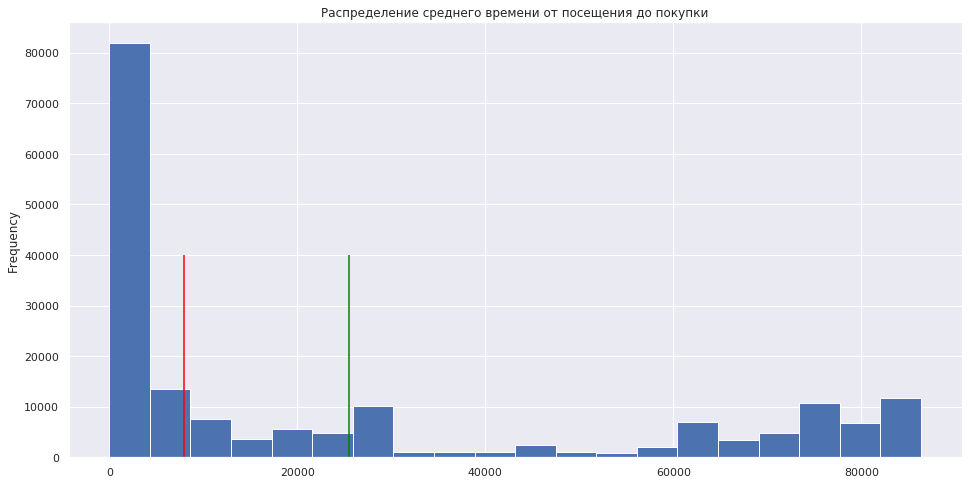

In [68]:
orders_visits['diff'].plot(kind='hist', grid=True, figsize=(16,8), bins=20, 
        title='Распределение среднего времени от посещения до покупки') # посмотрим на распределение разницы
plt.vlines(x=orders_visits['diff'].median(), ymin=0, ymax=40000, label='median', colors='red')
plt.vlines(x=orders_visits['diff'].mean(), ymin=0, ymax=40000, label='mean', colors='green')

In [69]:
orders_visits['diff'].median()  # В нашем случае воспользуемся медианой 

7980.0

**<span style="color:blue"> Рассмотрел моду ниже </span>**

In [70]:
orders_visits['diff'].mode() # получился 0

0    0
dtype: int64

In [71]:
orders_visits.query('diff != 0')['diff'].mode() # без 0 получилось время равное 13 минутам

0    780
dtype: int64

In [72]:
#Теперь удалим лишние столбцы
try: 
    orders = orders.drop(['month'], 1)
    visits = visits.drop(['month'], 1)
    orders_visits = orders_visits.drop(['start_ts', 'end_ts', 'diff', 'month'], 1)
except:
    print('Уже удалены')

**ВЫВОДЫ**

1. В среднем проходит 2160 секунд или 36 минут с момента первого посещения сайта до совершения покупки

>**<span style="color:orange">Учитывая яркую скошенность распределения и унимодальность, я бы предложил тебе здесь тоже смотреть в сторону моды. А в качестве вывода можно было бы написать, что большинство пользователей совершает покупку во время своей первой сессии.</span>**

**2. Применяя когортный анализ или другой метод, рассчитаем среднее количество покупок на одного покупателя за определённый период, например за 6 месяцев. Изучать изменение этой метрики во времени необязательно**

In [73]:
orders_6months = orders.query(' date >= "2017-12-01" ') #  ограничим период в 6 месяцев условием "2017-12-01", поскольку у нас 
# данные Яндекс.Афиши с июня 2017 по конец мая 2018 года, то есть возьмем последние полгода

In [74]:
orders_6months['orders_year'] = orders_6months['date'].dt.year # выделим год и месяц
orders_6months['orders_month'] = orders_6months['date'].dt.month

Сгруппируем по году и месяцу, затем посчитаем кол-во уникальных покупателей и число заказов

In [75]:
orders_6months_per_user = orders_6months.groupby(['orders_year', 'orders_month']).agg({'uid': ['count', 'nunique']})
orders_6months_per_user.columns = ['n_orders', 'n_users']
orders_6months_per_user['orders_per_user'] = (orders_6months_per_user['n_orders'] / 
                                              orders_6months_per_user['n_users'])

In [76]:
orders_6months_per_user 

n_orders  n_users  orders_per_user
orders_year orders_month                                    
2017        12                6218     4942            1.258
2018        1                 4721     3898            1.211
            2                 5281     4258            1.240
            3                 5326     4181            1.274
            4                 3273     2744            1.193
            5                 4346     3544            1.226

In [77]:
orders_6months_per_user['orders_per_user'].mean() # среднее количество покупок на одного покупателя по каждому месяцу за 6 месяцев

1.2337537952407784

In [78]:
orders_count = orders_6months['date'].shape[0]
orders_count # число заказов пользователей за 6 месяцев

29165

In [79]:
orders_buyers =  orders_6months['uid'].nunique() # число уникальных пользователей за 6 месяцев
orders_buyers

21824

In [80]:
orders_count / orders_buyers # среднее количество покупок на одного покупателя за 6 месяцев

1.3363728005865103

**ВЫВОДЫ**

1. Cреднее количество покупок на одного покупателя по каждому месяцу за 6 месяцев 1.23
2. Cреднее количество покупок на одного покупателя за 6 месяцев 1.34

>**<span style="color:green">Действительно, повторные покупки не очень распространены в нашем сервисе, молодец!</span>**

**3. Рассчитаем средний чек, применяя группировку по времени совершения покупки. Когортный анализ не подходит — он может исказить расчёты. Построим график, отражающий изменения метрики во времени**

In [81]:
orders_mean_paycheck = orders
orders_mean_paycheck['year'] = orders_mean_paycheck['date'].dt.year # выделим год и месяц
orders_mean_paycheck['month'] = orders_mean_paycheck['date'].dt.month
orders_mean_paycheck['week'] = orders_mean_paycheck['date'].dt.week

Средний чек — это деньги, которые человек тратит за раз. Чтобы его посчитать, всю выручку (а в нашем случае сгруппированную по времени) делят на количество чеков.

In [82]:
paycheck = orders_mean_paycheck.groupby(['year', 'month']).agg({'revenue': 'sum', 'uid': 'count'})
paycheck['mean_paycheck'] = paycheck['revenue'] / paycheck['uid']
paycheck # revenue:sum - выручка за период, а uid:count - количество чеков

revenue   uid  mean_paycheck
year month                               
2017 6      9557.490  2354          4.060
     7     12539.470  2363          5.307
     8      8758.780  1807          4.847
     9     18345.510  3387          5.416
     10    27987.700  5679          4.928
     11    27069.930  5659          4.784
     12    36388.600  6218          5.852
2018 1     19417.130  4721          4.113
     2     25560.540  5281          4.840
     3     28834.590  5326          5.414
     4     16858.060  3273          5.151
     5     20735.980  4346          4.771

In [83]:
paycheck['mean_paycheck'].mean() # Средний чек 

4.9569245874301995

**<span style="color:blue"> Оформил график </span>**

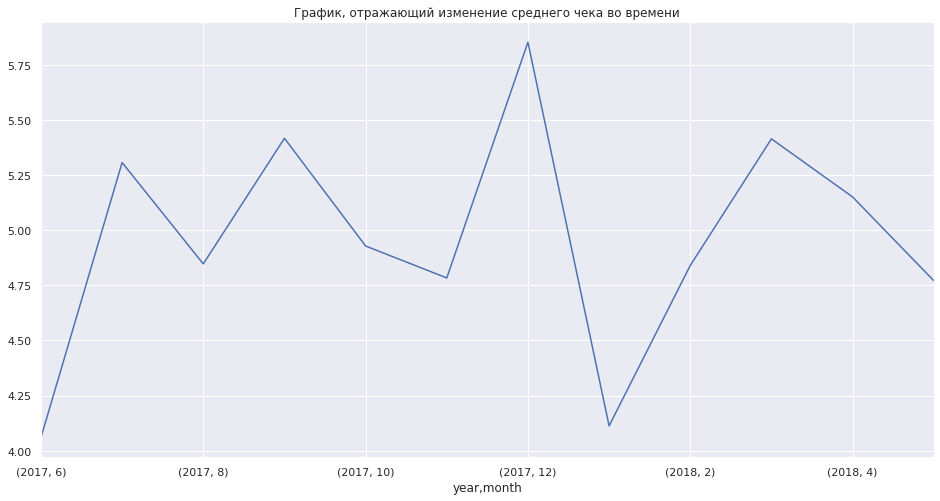

In [84]:
paycheck['mean_paycheck'].plot(title='График, отражающий изменение среднего чека во времени', grid=True, figsize=(16,8)) 

In [85]:
try: 
    orders = orders.drop(['year', 'month', 'week'], 1)
except:
    print('Уже удалены')

**ВЫВОДЫ**

1. Средний чек равен 5 у.с.
2. На протяжении с 2017-06 по 2017-12 присутсвует относительный рост, но затем идет стремительное падение

>**<span style="color:green">По расчётам всё отлично, осталось только оформить график.</span>**

**4. Выясним, как меняется LTV на покупателя по когортам. Помним, что LTV — накопительная метрика. Рассчитаем средний LTV по когортам за 6 месяцев; в расчёт включаем когорты, «прожившие» не менее 6 месяцев. Маржинальность сервиса — 100%. Отразим изменения метрики во времени на графике**

In [86]:
margine = 1 #  Маржинальность сервиса

In [87]:
orders['first_order_month'] = orders.groupby('uid')['date'].transform('min').astype('datetime64[M]')
orders['order_month'] = orders['date'].astype('datetime64[M]')

In [88]:
cohort_sizes = orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes # Посчитаем количество покупателей (n_buyers) в каждой когорте

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


Построим когорты и добавим данные о количестве новых покупателей (n_buyers) за каждый мес

In [89]:
cohorts = orders.groupby(['first_order_month', 'order_month']).agg({'revenue': 'sum'}).reset_index()
report = cohorts.merge(cohort_sizes, on='first_order_month')

In [90]:
report['gp'] = report['revenue'] * margine # Посчитали валовую прибыль
report['lifetime'] = ((report['order_month'] - report['first_order_month'])  # посчитали lifetime
                      / np.timedelta64(1, 'M')).round().astype('int')
report['ltv'] = report['gp'] / report['n_buyers'] 

**<span style="color:blue"> Построим тепловую карту по всем данным и когортам сначала </span>**

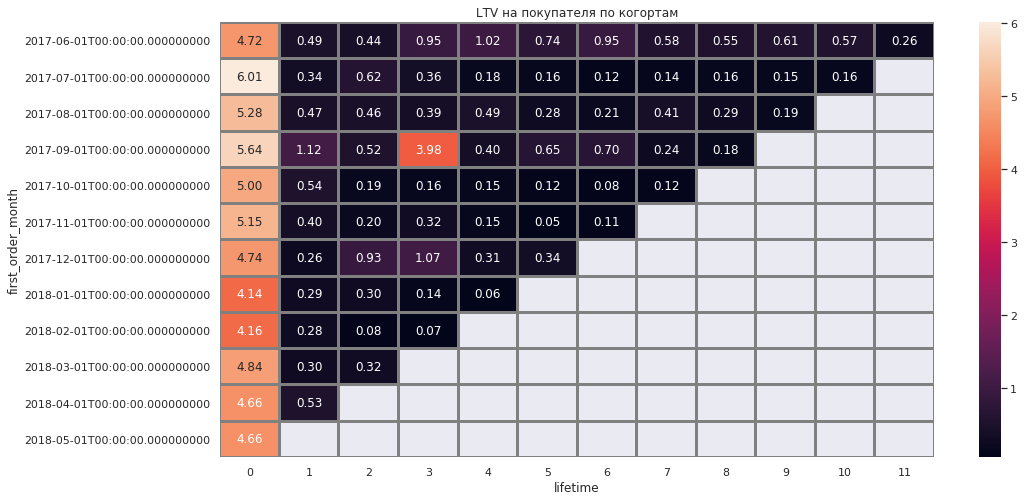

In [91]:
report_pivot1 = report.pivot_table(index='first_order_month', columns='lifetime', values='ltv', 
                                   aggfunc='mean')
plt.figure(figsize=(16, 8))
plt.title('LTV на покупателя по когортам')
sbs.heatmap(report_pivot1, annot=True, fmt='.2f', linewidths=2, linecolor='gray')

**<span style="color:blue"> Теперь отфильтруем </span>**

In [92]:
report = report.query('lifetime < 7') # так как нужен средний LTV по когортам за 6 месяцев, ограничим lifetime

In [93]:
req_dates = ['2017-06-01', '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01']
#  даты когорт, «проживших» не менее 6 месяцев
report = report.query('first_order_month in @req_dates')
report['only_first_order_month'] = report['first_order_month'].dt.strftime('%Y-%m') 

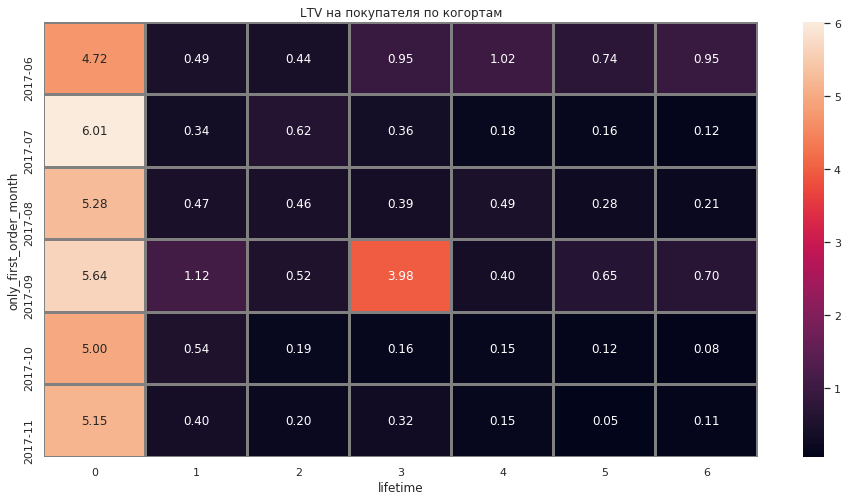

In [94]:
# Отразим изменения метрики во времени на графике, то есть по lifetime
report_pivot_table = report.pivot_table(index='only_first_order_month', columns='lifetime', values='ltv',
                                        aggfunc='mean').fillna('')
plt.figure(figsize=(16, 8))
plt.title('LTV на покупателя по когортам')
sbs.heatmap(report_pivot_table, annot=True, fmt='.2f', linewidths=2, linecolor='gray')

**<span style="color:blue"> Теперь возьмем среднее на 6-ой месяц </span>**

In [95]:
report_pivot_table[6].sum()

2.182663468490745

Посчитаем средний LTV по когортам за 6 месяцев 

In [96]:
ltv_201706 = report_pivot_table.loc['2017-06'].sum()
ltv_201706

9.310523974295595

In [97]:
ltv_201707 = report_pivot_table.loc['2017-07'].sum()
ltv_201707

7.78098283931356

In [98]:
ltv_201708 = report_pivot_table.loc['2017-08'].sum()
ltv_201708

7.586525547445244

In [99]:
ltv_201709 = report_pivot_table.loc['2017-09'].sum() 
ltv_201709

13.008070515304158

In [100]:
ltv_201710 = report_pivot_table.loc['2017-10'].sum()
ltv_201710

6.244771889400893

In [101]:
ltv_201711 = report_pivot_table.loc['2017-11'].sum()
ltv_201711

6.395243812790933

In [102]:
all_ltv = [ltv_201706, ltv_201707, ltv_201708, ltv_201709, ltv_201710, ltv_201711]
np.mean(all_ltv) # средний LTV по всем когортам за 6 месяцев

8.387686429758398

**ВЫВОДЫ**

1. Cредний LTV по всем когортам за 6 месяцев = 8.39 у.с
2. После 0 lifetime LTV стремительно падает
3. Можно заметить выделяющееся у 4 когорты на 3 lifetime, это единственная дата, где LTV значитительно приблизилось к исходному LTV 

>**<span style="color:red">По расчёту LTV все здорово, но давай всё-таки построим тепловую карту по всем данным и когортам сначала, и выведем ее накопленным итогом (LTV - это пожизненная ценность клиента), после этого отфильтруем нашу итоговую табличку и возьмем среднее на 6-ой месяц (то есть среднее по 6 столбцу), то есть мы берем среднее LTV среди когорт.</span>**

### **Маркетинговые**

*Файл costs.csv хранит лог сервера с информацией о расходах на маркетинг.*

Посчитаем и отобразим на графиках, как маркетинговые метрики различаются по рекламным источникам. Один и тот же пользователь мог заходить на сайт из нескольких источников, поэтому важно определить «главный» источник для каждого и учитывать это в расчётах. Например, главным может стать первый источник перехода.

**1. Посчитаем общую сумму расходов на маркетинг. Выясним, как траты распределены по источникам. Визуализируем изменения метрик во времени**

In [103]:
costs['costs'].sum() # Посчитаем общую сумму расходов на маркетинг

329131.62

In [104]:
costs.groupby('source_id').agg({'costs':'sum'}).sort_values(by='costs') # как траты распределены по источникам

,costs
source_id,
9,5517.490
10,5822.490
1,20833.270
2,42806.040
5,51757.100
4,61073.600
3,141321.630


In [105]:
costs['year'] = costs['date'].dt.year
costs['month'] = costs['date'].dt.month

**<span style="color:blue"> Подписал графики </span>**

**Визуализируем изменения метрик во времени**

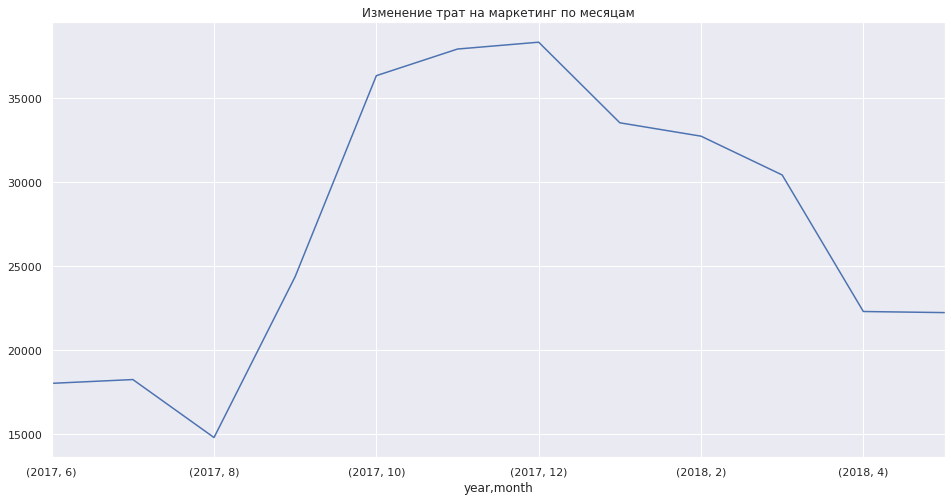

In [106]:
costs.groupby(['year', 'month'])['costs'].sum().plot(grid=True, 
                        title='Изменение трат на маркетинг по месяцам', figsize=(16,8)) # в общем по всем источникам 

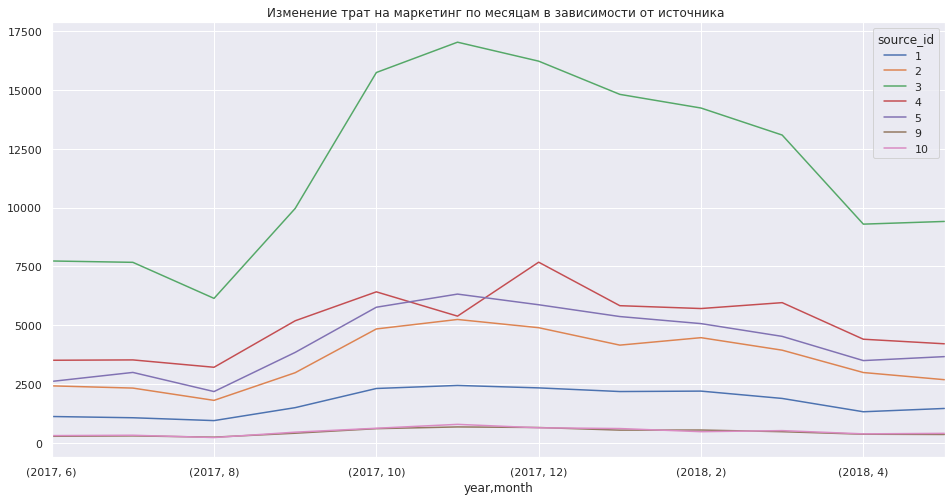

In [107]:
costs.pivot_table(index=['year', 'month'], columns='source_id', values='costs', aggfunc='sum').plot(grid=True, 
                    title='Изменение трат на маркетинг по месяцам в зависимости от источника ', figsize=(16,8))

In [108]:
try: 
    costs = costs.drop(['year', 'month'], 1)
    report = report.drop('only_first_order_month', 1)
except:
    print('Уже удалены')

**ВЫВОДЫ**

1. Общая сумма расходов на маркетинг 329131.62 у.с
2. Самый затратный источник - 3 
3. С 2017-08 затраты на маркетинг стремительно растут, затем падают и фиксируются 
4. В зависимости от источника привлечения самый затратный по времени источник - 3, также по графику видно его высокую волатильность

>**<span style="color:red">Здесь все супер, опять же не забываем про оформление. </span>**

**2. Рассчитаем средний CAC на одного покупателя для всего проекта и для каждого источника трафика. Отразим изменения метрик на графиках**

In [109]:
costs['month'] = costs['date'].astype('datetime64[M]') 
costs['year'] = costs['date'].dt.year 
report['first_order_month'] = report['first_order_month'].astype('datetime64[M]') 
costs_per_month = costs.groupby('month').agg({'costs':'sum'}) # расходы на каждый месяц

In [110]:
report_costs = report.merge(costs_per_month, left_on='order_month', right_on='month')

In [111]:
report_costs['cac'] = report_costs['costs'] / report_costs['n_buyers'] # Рассчитаем CAC

**Визуализируем изменения метрик во времени**

**<span style="color:blue"> Подписал графики </span>**

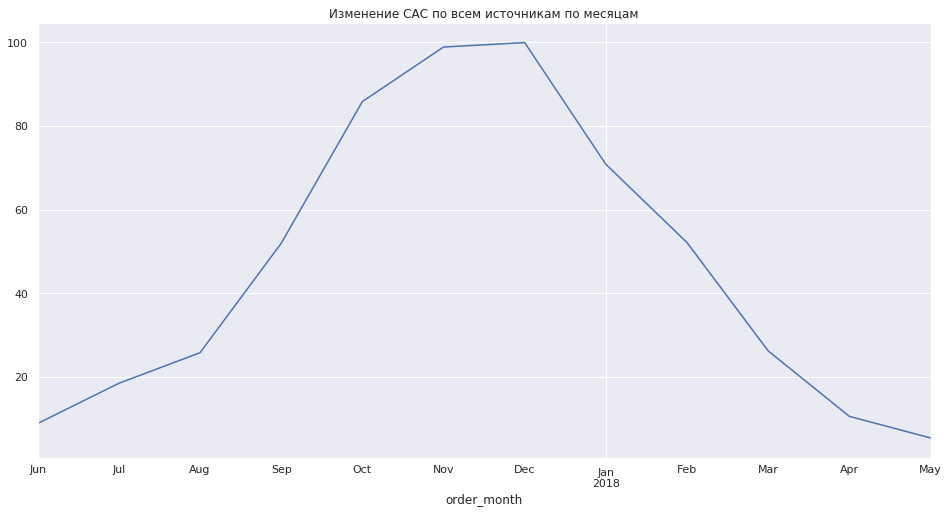

In [112]:
report_costs.groupby(['order_month'])['cac'].sum().plot(grid=True, 
                title='Изменение CAC по всем источникам по месяцам', figsize=(16,8))  # в общем cac по всем источникам 

In [113]:
report_costs['cac'].median() # средний CAC на одного покупателя, поскольку распределение выше близко к нормальному

11.290155691366163

**Один и тот же пользователь мог заходить на сайт из нескольких источников, поэтому определим «главный» источник - первый источник перехода.
Теперь рассчитаем средний CAC для каждого источника трафика. Для этого добавим данные из visits. Стоит отметить, что ранее мы объединили orders и visits в orders_visits по месяцу и айди из таблиц**

Добавим сумму затрат на каждый источник в месяц 

In [114]:
costs_per_source_id = pd.DataFrame()
for source_id in costs['source_id'].unique():
    cond = 'source_id == ' + str(source_id)
    name = 'c_source' + str(source_id) 
    costs_per_source_id[name] = costs.query(cond).groupby('month')['costs'].sum()
    # costs_per_source_id - расходы по каждому источнику на каждый месяц
costs_per_source_id = costs_per_source_id.reset_index()

In [115]:
costs_per_source_id

,month,c_source1,c_source2,c_source3,c_source4,c_source5,c_source9,c_source10
0,2017-06-01,1125.610,2427.380,7731.650,3514.800,2616.120,285.220,314.220
1,2017-07-01,1072.880,2333.110,7674.370,3529.730,2998.140,302.540,329.820
2,2017-08-01,951.810,1811.050,6143.540,3217.360,2185.280,248.930,232.570
3,2017-09-01,1502.010,2985.660,9963.550,5192.260,3849.140,415.620,460.670
4,2017-10-01,2315.750,4845.000,15737.240,6420.840,5767.400,609.410,627.240
5,2017-11-01,2445.160,5247.680,17025.340,5388.820,6325.340,683.180,792.360
6,2017-12-01,2341.200,4897.800,16219.520,7680.470,5872.520,657.980,645.860
7,2018-01-01,2186.180,4157.740,14808.780,5832.790,5371.520,547.160,614.350
8,2018-02-01,2204.480,4474.340,14228.560,5711.960,5071.310,551.500,480.880
9,2018-03-01,1893.090,3943.140,13080.850,5961.870,4529.620,480.290,526.410


In [116]:
costs_per_source_id.loc[0, 'c_source1':'c_source10'].sum()#Проверим, сложив затраты по каждому источнику с общими затратами

18015.0

In [117]:
report_costs.head(1) # Все верно

,first_order_month,order_month,revenue,n_buyers,gp,lifetime,ltv,costs,cac
0,2017-06-01,2017-06-01,9557.490,2023,9557.490,0,4.724,18015.000,8.905


Посчитаем количество уникальных покупателей от этого источника в этот месяц с помощью orders_visits, т.к. CAC - цена привлечения платящего пользователя, то нужны данные пользователей из orders, но в orders нет столбца source_id. Мы решили заранее эту проблему объединив orders и visits, как говорилось выше

In [118]:
orders_visits['month'] = orders_visits['date'].astype('datetime64[M]') 
visits_per_source_id = pd.DataFrame()
for source_id in costs['source_id'].unique():
    cond = 'source_id == ' + str(source_id)
    name = 'uid_' + str(source_id)
    visits_per_source_id[name] = orders_visits.query(cond).groupby('month')['uid'].nunique() 
    # количество уникальных покупателей по каждому источнику на каждый месяц
visits_per_source_id = visits_per_source_id.reset_index()

In [119]:
visits_per_source_id

,month,uid_1,uid_2,uid_3,uid_4,uid_5,uid_9,uid_10
0,2017-06-01,326,342,703,481,451,86,107
1,2017-07-01,338,339,555,584,509,75,59
2,2017-08-01,233,217,367,385,403,85,43
3,2017-09-01,457,432,819,699,728,109,88
4,2017-10-01,724,757,1307,1433,1168,201,225
5,2017-11-01,908,878,1365,1555,870,263,160
6,2017-12-01,919,833,1448,1712,972,176,89
7,2018-01-01,636,566,1097,1263,807,142,107
8,2018-02-01,659,619,1194,1318,915,127,160
9,2018-03-01,720,672,1083,1270,787,315,211


In [120]:
cac_per_source = pd.DataFrame()
cac_per_source['month'] = visits_per_source_id['month']
for source_id in costs['source_id'].unique():
    name = 'cac_' + str(source_id)
    name_c = 'c_source' + str(source_id)
    name_uid = 'uid_' + str(source_id)
    cac_per_source[name] = costs_per_source_id[name_c] / visits_per_source_id[name_uid]
# cac по каждому источнику

In [121]:
cac_per_source

,month,cac_1,cac_2,cac_3,cac_4,cac_5,cac_9,cac_10
0,2017-06-01,3.453,7.098,10.998,7.307,5.801,3.317,2.937
1,2017-07-01,3.174,6.882,13.828,6.044,5.890,4.034,5.590
2,2017-08-01,4.085,8.346,16.740,8.357,5.423,2.929,5.409
3,2017-09-01,3.287,6.911,12.166,7.428,5.287,3.813,5.235
4,2017-10-01,3.199,6.400,12.041,4.481,4.938,3.032,2.788
5,2017-11-01,2.693,5.977,12.473,3.465,7.271,2.598,4.952
6,2017-12-01,2.548,5.880,11.201,4.486,6.042,3.739,7.257
7,2018-01-01,3.437,7.346,13.499,4.618,6.656,3.853,5.742
8,2018-02-01,3.345,7.228,11.917,4.334,5.542,4.343,3.006
9,2018-03-01,2.629,5.868,12.078,4.694,5.756,1.525,2.495


Посчитаем средний CAC у каждого источника

In [122]:
cac_1 = cac_per_source['cac_1'].median()
cac_1

3.1863754535944295

In [123]:
cac_2 = cac_per_source['cac_2'].median()
cac_2

6.896790191740413

In [124]:
cac_3 = cac_per_source['cac_3'].median()
cac_3

12.12192694962778

In [125]:
cac_4 = cac_per_source['cac_4'].median()
cac_4

4.65629425938741

In [126]:
cac_4 = cac_per_source['cac_5'].median()
cac_4

5.778131133130669

In [127]:
cac_9 = cac_per_source['cac_9'].median()
cac_9

3.775775125104254

In [128]:
cac_10 = cac_per_source['cac_10'].median()
cac_10

3.9788750000000004

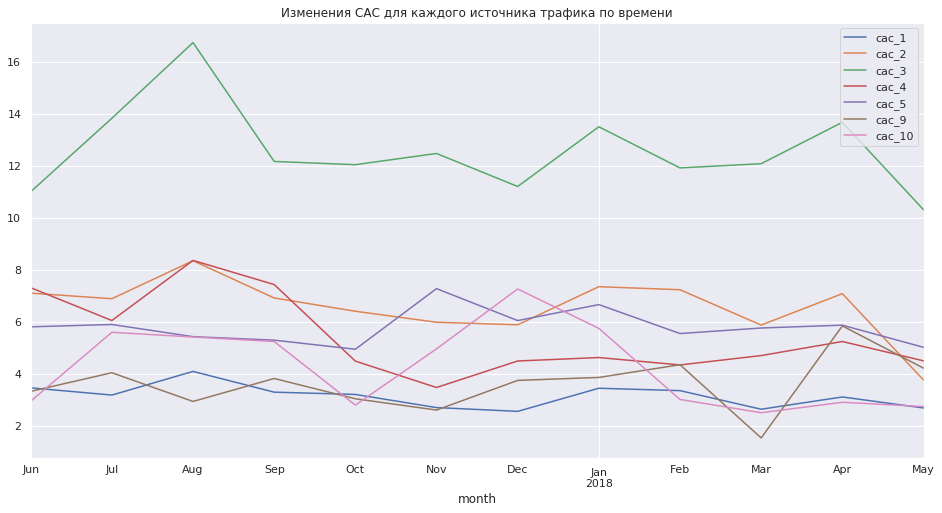

In [129]:
cac_per_source.plot(x='month', grid=True, figsize=(16,8), title = 'Изменения CAC для каждого источника трафика по времени')
plt.legend(loc=1)

In [130]:
orders_visits = orders_visits.drop('month', 1)

**ВЫВОДЫ**

1. Средний CAC на одного покупателя = 11.29 у.с. по всем источникам
2. График изменения CAC по всем источникам по месяцам имеет близкое к нормальному распределение, и в начале периода CAC приблизительно равен CAC в конце
3. А график изменения CAC для каждого источника трафика по времени демонстрирует нам что с течением времени только CAC для 3, 9, 5 и 1 источников сохранился на приблизительно одном уровне в большей степени, чем другие
4. Самый высокий средний CAC у источника трафика 3, а самый низкий у 1

>**<span style="color:green">По расчётам `cac` у тебя все хорошо, молодец. Правда обычно все же считают `mean`, а не `median` если речь идет уже о агрегированных метриках.</span>**

**3. Рассчитаем ROMI по когортам в разрезе источников. Сравним окупаемость за одинаковые периоды жизни когорт. Обратим внимание, что клиенты, пришедшие из разных источников, могут иметь разный LTV. Построим графики, отражающие изменения метрик во времени.**

Чтобы посчитать ROMI требуется поделить LTV на CAC, в нашем случае нужно рассчитать ROMI по когортам в разрезе источников. Но
* Когорты у нас есть в report_costs, но они были ограничены по lifetime, придется рассчитать новые
* CAC в разрезе источников есть в cac_per_source
* Не хватает LTV в разрезе источников, в этом поможет orders_visits

In [131]:
margine = 1 #  Маржинальность сервиса

In [132]:
cac_per_source # CAC

,month,cac_1,cac_2,cac_3,cac_4,cac_5,cac_9,cac_10
0,2017-06-01,3.453,7.098,10.998,7.307,5.801,3.317,2.937
1,2017-07-01,3.174,6.882,13.828,6.044,5.890,4.034,5.590
2,2017-08-01,4.085,8.346,16.740,8.357,5.423,2.929,5.409
3,2017-09-01,3.287,6.911,12.166,7.428,5.287,3.813,5.235
4,2017-10-01,3.199,6.400,12.041,4.481,4.938,3.032,2.788
5,2017-11-01,2.693,5.977,12.473,3.465,7.271,2.598,4.952
6,2017-12-01,2.548,5.880,11.201,4.486,6.042,3.739,7.257
7,2018-01-01,3.437,7.346,13.499,4.618,6.656,3.853,5.742
8,2018-02-01,3.345,7.228,11.917,4.334,5.542,4.343,3.006
9,2018-03-01,2.629,5.868,12.078,4.694,5.756,1.525,2.495


In [133]:
orders_visits = orders_visits.drop_duplicates()

In [134]:
orders_visits['first_order_month'] = orders_visits.groupby('uid')['date'].transform('min').astype('datetime64[M]')
orders_visits['order_month'] = orders_visits['date'].astype('datetime64[M]') # снова выделим из даты нужные значения

In [135]:
cohort_sizes = pd.DataFrame() # число новых покупателей за каждую дату по источнику
for source_id in costs['source_id'].unique():
    cond = 'source_id == ' + str(source_id)
    name = 'cohort_s' + str(source_id)
    cohort_sizes[name] = orders_visits.query(cond).groupby('first_order_month')['uid'].nunique() 
cohort_sizes = cohort_sizes.reset_index()

In [136]:
cohort_sizes

,first_order_month,cohort_s1,cohort_s2,cohort_s3,cohort_s4,cohort_s5,cohort_s9,cohort_s10
0,2017-06-01,369,394,755,545,501,107,112
1,2017-07-01,358,350,575,614,524,90,59
2,2017-08-01,230,215,392,397,398,98,48
3,2017-09-01,464,428,845,710,737,118,92
4,2017-10-01,716,693,1316,1422,1145,204,230
5,2017-11-01,848,776,1347,1486,867,239,158
6,2017-12-01,803,689,1380,1587,909,174,88
7,2018-01-01,540,468,1036,1143,745,113,107
8,2018-02-01,560,504,1116,1196,818,105,148
9,2018-03-01,594,527,1001,1149,693,239,199


Построим когорты и добавим данные о количестве новых покупателей (n_buyers) и revenue за каждый мес

In [137]:
cohorts1 = orders_visits.query('source_id == 1').groupby(['first_order_month', 
                                                   'order_month']).agg({'revenue': 'sum'}).reset_index()
cohorts2 = orders_visits.query('source_id == 2').groupby(['first_order_month', 
                                                   'order_month']).agg({'revenue': 'sum'}).reset_index()
cohorts3 = orders_visits.query('source_id == 3').groupby(['first_order_month', 
                                                   'order_month']).agg({'revenue': 'sum'}).reset_index()
cohorts4 = orders_visits.query('source_id == 4').groupby(['first_order_month', 
                                                   'order_month']).agg({'revenue': 'sum'}).reset_index()
cohorts5 = orders_visits.query('source_id == 5').groupby(['first_order_month', 
                                                   'order_month']).agg({'revenue': 'sum'}).reset_index()
cohorts9 = orders_visits.query('source_id == 9').groupby(['first_order_month', 
                                                   'order_month']).agg({'revenue': 'sum'}).reset_index()
cohorts10 = orders_visits.query('source_id == 10').groupby(['first_order_month', 
                                                   'order_month']).agg({'revenue': 'sum'}).reset_index()

In [138]:
report1 = cohorts1.merge(cohort_sizes[['first_order_month','cohort_s1']], on='first_order_month')
report2 = cohorts2.merge(cohort_sizes[['first_order_month','cohort_s2']], on='first_order_month')
report3 = cohorts3.merge(cohort_sizes[['first_order_month','cohort_s3']], on='first_order_month')
report4 = cohorts4.merge(cohort_sizes[['first_order_month','cohort_s4']], on='first_order_month')
report5 = cohorts5.merge(cohort_sizes[['first_order_month','cohort_s5']], on='first_order_month')
report9 = cohorts9.merge(cohort_sizes[['first_order_month','cohort_s9']], on='first_order_month')
report10 = cohorts10.merge(cohort_sizes[['first_order_month','cohort_s10']], on='first_order_month')

In [139]:
report1['gp'] = report1['revenue'] * margine 
report2['gp'] = report2['revenue'] * margine # Посчитали валовую прибыль
report3['gp'] = report3['revenue'] * margine 
report4['gp'] = report4['revenue'] * margine 
report5['gp'] = report5['revenue'] * margine 
report9['gp'] = report9['revenue'] * margine 
report10['gp'] = report10['revenue'] * margine 

In [140]:
report1['lifetime'] = ((report1['order_month'] - report1['first_order_month'])  # посчитали lifetime
                      / np.timedelta64(1, 'M')).round().astype('int')
report2['lifetime'] = ((report2['order_month'] - report2['first_order_month'])  
                      / np.timedelta64(1, 'M')).round().astype('int')
report3['lifetime'] = ((report3['order_month'] - report3['first_order_month']) 
                      / np.timedelta64(1, 'M')).round().astype('int')
report4['lifetime'] = ((report4['order_month'] - report4['first_order_month']) 
                      / np.timedelta64(1, 'M')).round().astype('int')
report5['lifetime'] = ((report5['order_month'] - report5['first_order_month']) 
                      / np.timedelta64(1, 'M')).round().astype('int')
report9['lifetime'] = ((report9['order_month'] - report9['first_order_month'])  
                      / np.timedelta64(1, 'M')).round().astype('int')
report10['lifetime'] = ((report10['order_month'] - report10['first_order_month'])  
                      / np.timedelta64(1, 'M')).round().astype('int')

In [141]:
report1['ltv'] = report1['gp'] / report1['cohort_s1'] 
report2['ltv'] = report2['gp'] / report2['cohort_s2'] 
report3['ltv'] = report3['gp'] / report3['cohort_s3'] 
report4['ltv'] = report4['gp'] / report4['cohort_s4']  # посчитали ltv
report5['ltv'] = report5['gp'] / report5['cohort_s5'] 
report9['ltv'] = report9['gp'] / report9['cohort_s9'] 
report10['ltv'] = report10['gp'] / report10['cohort_s10'] 

In [142]:
report1_new = report1.merge(cac_per_source[['month','cac_1']], left_on='order_month', right_on='month')
report2_new = report2.merge(cac_per_source[['month','cac_2']], left_on='order_month', right_on='month')
report3_new = report3.merge(cac_per_source[['month','cac_3']], left_on='order_month', right_on='month')
report4_new = report4.merge(cac_per_source[['month','cac_4']], left_on='order_month', right_on='month')
report5_new = report5.merge(cac_per_source[['month','cac_5']], left_on='order_month', right_on='month')
report9_new = report9.merge(cac_per_source[['month','cac_9']], left_on='order_month', right_on='month')
report10_new = report10.merge(cac_per_source[['month','cac_10']], left_on='order_month', right_on='month')
# Объединили report и cac_per_source по выделенному месяцу, тем самым добавив данные о cac_1 по источнику

In [143]:
report1_new['romi'] = report1_new['ltv'] / report1_new['cac_1'] 
report2_new['romi'] = report2_new['ltv'] / report2_new['cac_2'] 
report3_new['romi'] = report3_new['ltv'] / report3_new['cac_3']  # Посчитаем romi
report4_new['romi'] = report4_new['ltv'] / report4_new['cac_4'] 
report5_new['romi'] = report5_new['ltv'] / report5_new['cac_5'] 
report9_new['romi'] = report9_new['ltv'] / report9_new['cac_9'] 
report10_new['romi'] = report10_new['ltv'] / report10_new['cac_10'] 

In [144]:
report1_new['first_order_month'] = report1_new['first_order_month'].dt.strftime('%Y-%m') 
report2_new['first_order_month'] = report2_new['first_order_month'].dt.strftime('%Y-%m') 
report3_new['first_order_month'] = report3_new['first_order_month'].dt.strftime('%Y-%m') 
report4_new['first_order_month'] = report4_new['first_order_month'].dt.strftime('%Y-%m') 
report5_new['first_order_month'] = report5_new['first_order_month'].dt.strftime('%Y-%m') 
report9_new['first_order_month'] = report9_new['first_order_month'].dt.strftime('%Y-%m') 
report10_new['first_order_month'] = report10_new['first_order_month'].dt.strftime('%Y-%m') 

In [145]:
output1 = report1_new.pivot_table(
    index='first_order_month', columns='lifetime', values='romi', aggfunc='mean'
).cumsum(axis=1).round(2)
 
output2 = report2_new.pivot_table(
    index='first_order_month', columns='lifetime', values='romi', aggfunc='mean'
).cumsum(axis=1).round(2)

output3 = report3_new.pivot_table(
    index='first_order_month', columns='lifetime', values='romi', aggfunc='mean'
).cumsum(axis=1).round(2)

output4 = report4_new.pivot_table(
    index='first_order_month', columns='lifetime', values='romi', aggfunc='mean'
).cumsum(axis=1).round(2)

output5 = report5_new.pivot_table(
    index='first_order_month', columns='lifetime', values='romi', aggfunc='mean'
).cumsum(axis=1).round(2)

output9 = report9_new.pivot_table(
    index='first_order_month', columns='lifetime', values='romi', aggfunc='mean'
).cumsum(axis=1).round(2)

output10 = report10_new.pivot_table(
    index='first_order_month', columns='lifetime', values='romi', aggfunc='mean'
).cumsum(axis=1).round(2)

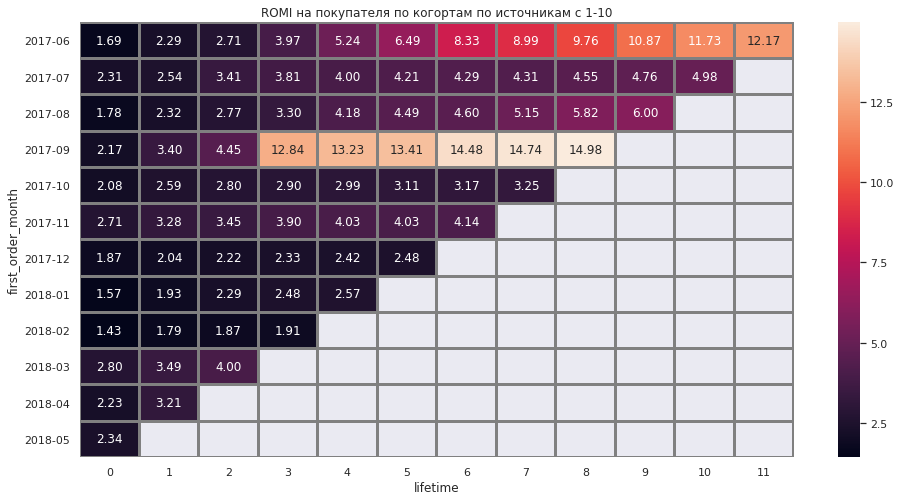

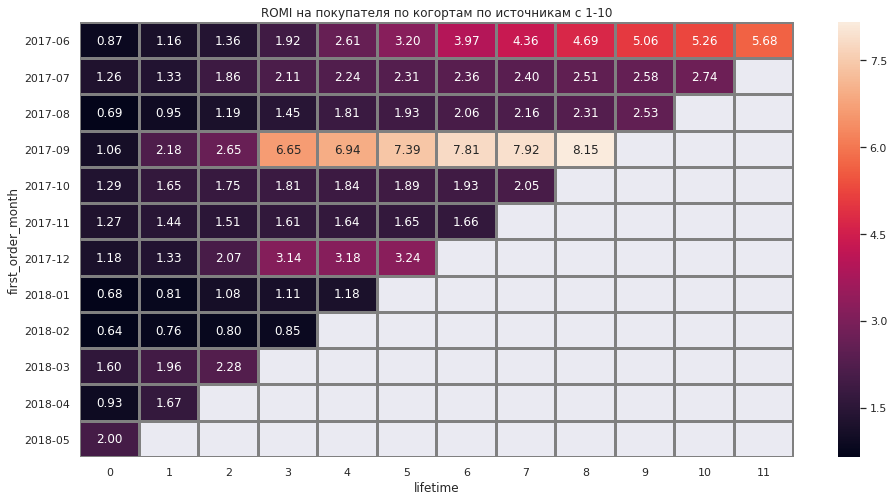

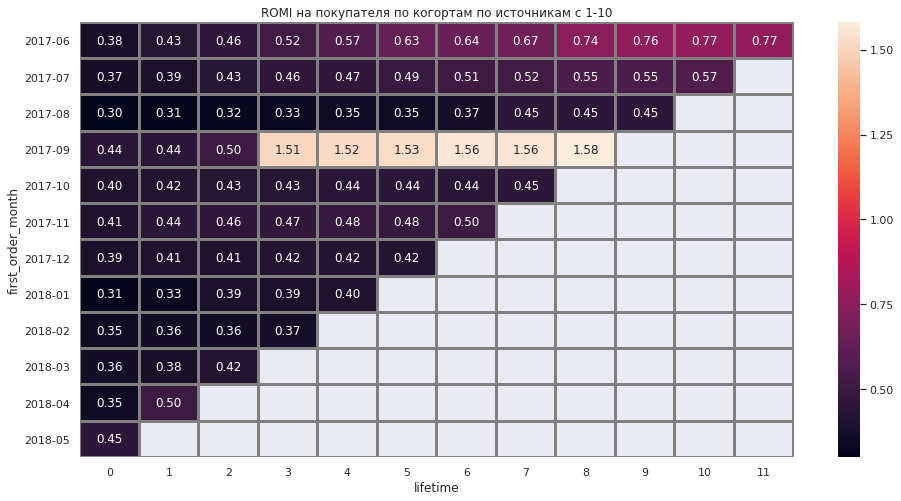

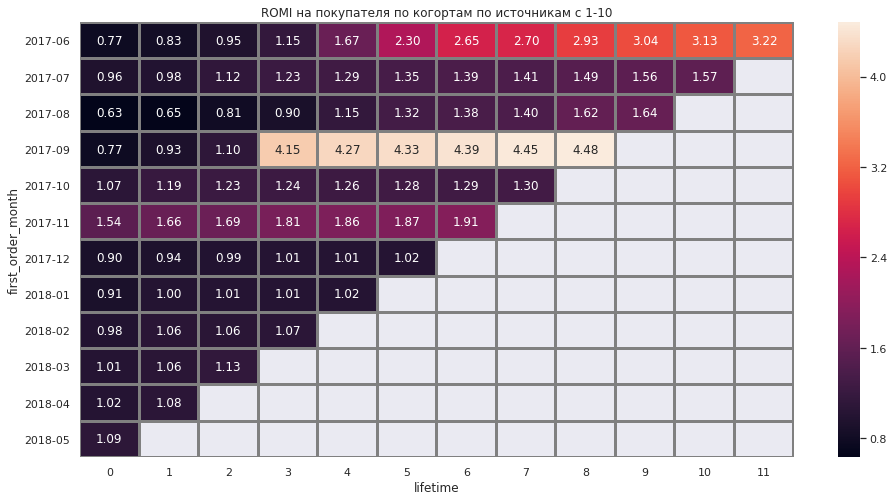

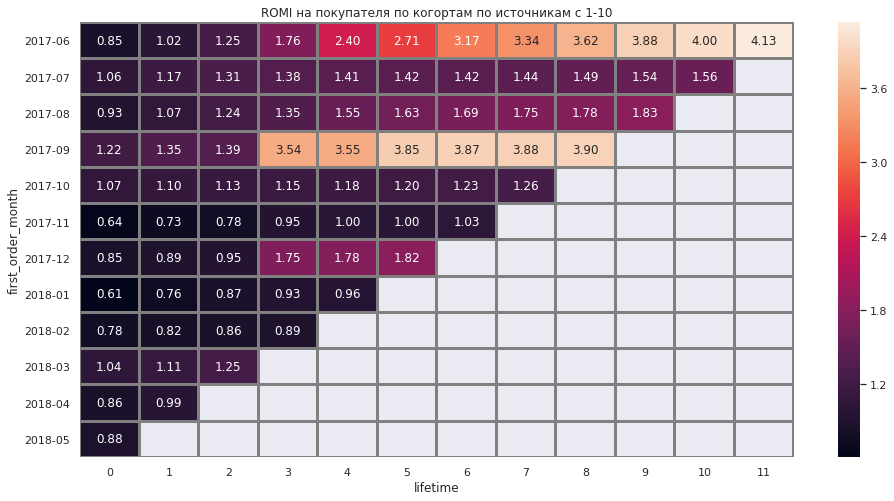

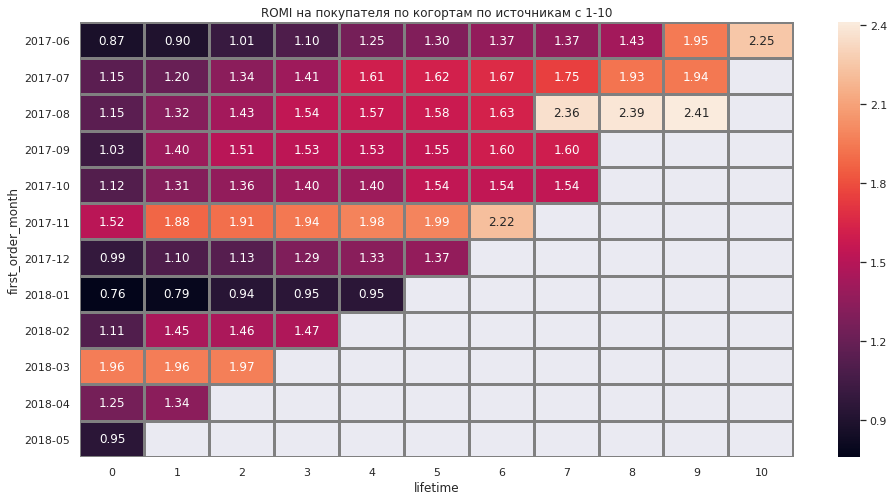

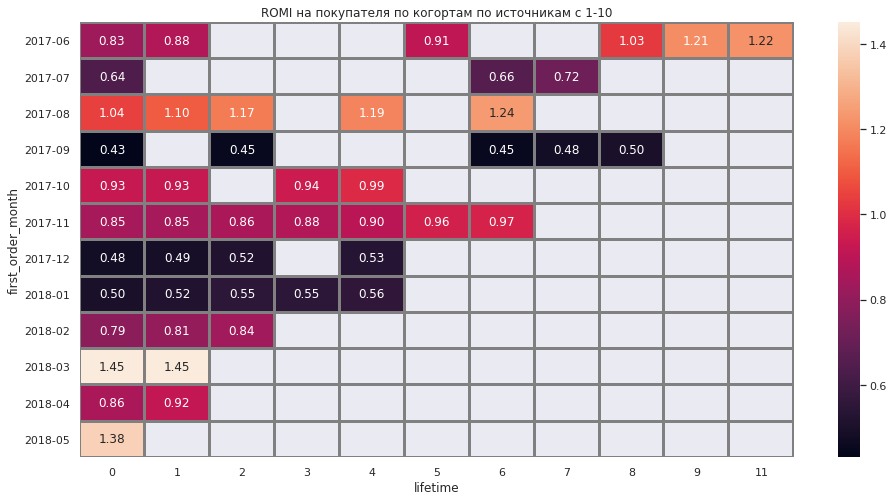

In [146]:
# Визуализируем
source = [output1, output2, output3, output4, output5, output9, output10]
for s in source:
    plt.figure(figsize=(16, 8))
    plt.title('ROMI на покупателя по когортам по источникам с 1-10')
    sbs.heatmap(s, annot=True, fmt='.2f', linewidths=2, linecolor='gray')

**ВЫВОДЫ**

1. Сравним окупаемость за одинаковые периоды жизни когорт в разрезе источников:
    * Источник 1:
        1. Все когорты окупились на 0 lifetime
        2. 1 и 4 когорты принесли больше всего прибыли (окупились в 12 и 15 раз)
    * Источник 2:
        1. Прослеживаются те же тенденции, 1 и 4 когорты принесли больше всего прибыли
        2. Не окупилась 9 когорта, но большинство окупилось на 1 lifetime
    * Источник 3:
        1. Прослеживаются те же тенденции, 1 и 4 когорты принесли больше всего прибыли
        2. Окупилась только 4 когорта
    * Источник 4:
        1. Прослеживаются те же тенденции, 1 и 4 когорты принесли больше всего прибыли
        2. Окупилась все когорты, все окупились на 5 lifetime, большинство окупились на 3 lifetime
    * Источник 5:
        1. Прослеживаются те же тенденции, 1 и 4 когорты принесли больше всего прибыли
        2. 4 когорты из 12 не окупились, большинство окупились на 4 lifetime
    * Источник 9:
        1. 1,3,6 и 10 когорты принесли больше всего прибыли (окупились примерно в 2.5 раза)
        2. Не окупилась 8 и 12 когорты 
        3. Самая цветная и насыщенная карта, что говорит о выскоком уровен окупаемости в общем
    * Источник 10:
        1. Присутствют пробелы, что говорит о недостатке данных для подсчета 
        2. 3 из 12 когорт окупились 
        3. 12 и 10 когорты принесли больше всего прибыли (окупились примерно в 1.4 раз)

>**<span style="color:green">Обычно на этом шаге у большинства студентов возникает основная масса проблем, но у тебя здесь все просто великолепно. Отдельно отмечу твое решение с использованием циклов (можно было его масштабировать и включить расчёты ltv в тело цикла). </span>**

## Общий вывод
<a id="conclusion"></a>

1. В изучение данных из файла:
    1. Необходимо привести к datetime visits[End Ts], visits[Start Ts], orders[Buy Ts], costs[dt]
    2. Основываясь на распределнии orders['Revenue'] стоит рассчитать моду
    3. У costs[costs] и orders[revenue] mean > median примерно в 2 раза, а также boxplot с выбросами 
    4. Нет дублированных и пропущенных записей
    5. Следует изменить названия столбцов в costs, visits, orders
    6. Использование desktop в примерно в 2,7 раза, чем touch
2. Предобработка данных:
    1. Исправили названия столбцов 
    2. Привели к datetime visits[End Ts], visits[Start Ts], orders[Buy Ts], costs[dt]
    3. Рассчитали моду для orders['Revenue'] 
    4. Выяснили, что visits[end_ts] и orders[date] выходят за промежуток (с июня 2017 по конец мая 2018 года ), а остальные даты нет
3. Анализ данных:
* **Продуктовые метрики**:
1. :
    1. На графиках DAU и WAU заметна одна и та же вершина по дате 2017-47 (week) или 2017-11-24 (date), также на графике DAU заметно падение по дате 2018-04, которое не отразилось на WAU
    2. В свою очередь можно выделить 3 периода в DAU по количеству пользователей:
        * 1: 2017-06 по 2017-10 mean = 553; 
        * 2: 2017-10 по 2018-04 mean = 1179; 
        * 3: 2018-04 по 2018-05 mean = 815
    4. На графике WAU заметен стабильный рост с 2017-08 по 2017-12, а также график более сглаженный чем графики DAU и WAU
    5. MAU видна та самая вершина из DAU и WAU, которая является максимальной точкой на графике
    6. DAU=908 MAU=5716 WAU=23228
2. :
    1. Пользователи в среднем заходят на сайт 1 раз в день
    2. Прослеживается тенденция из графика DAU на 2017-11-24
3. :
    1. ASL = 60 секунд
4. :  
    1. Cредний Retention Rate на второй месяц «жизни» когорт = 4.63%
    2. Основываясь на таблице с Retention Rate, можно прийти к выводу, что в среднем он держится на уровне 4.16%
    
* **Метрики электронной коммерции**:
1. :
    1. В среднем проходит 2160 секунд или 36 минут с момента первого посещения сайта до совершения покупки
2. :
    1. Cреднее количество покупок на одного покупателя по каждому месяцу за 6 месяцев 1.23
    2. Cреднее количество покупок на одного покупателя за 6 месяцев 1.34
3. :
    1. Средний чек равен 5 у.с.
    2. На протяжении с 2017-06 по 2017-12 присутсвует относительный рост, но затем идет стремительное падение
4. :
    1. Cредний LTV по всем когортам за 6 месяцев = 8.39 у.с
    2. После 0 lifetime LTV стремительно падает
    3. Можно заметить выделяющееся у 4 когорты на 3 lifetime, это единственная дата, где LTV значитительно приблизилось к исходному LTV 

* **Маркетинговые метрики**:
1. :
    1. Общая сумма расходов на маркетинг 329131.62 у.с
    2. Самый затратный источник - 3 
    3. С 2017-08 затраты на маркетинг стремительно растут, затем падают и фиксируются 
    4. В зависимости от источника привлечения самый затратный по времени источник - 3, также по графику видно его высокую волатильность
2. :
    1. Средний CAC на одного покупателя = 11.29 у.с. по всем источникам
    2. График изменения CAC по всем источникам по месяцам имеет близкое к нормальному распределение, и в начале периода CAC приблизительно равен CAC в конце
    3. А график изменения CAC для каждого источника трафика по времени демонстрирует нам что с течением времени только CAC для 3, 9, 5 и 1 источников сохранился на приблизительно одном уровне в большей степени, чем другие
    4. Самый высокий средний CAC у источника трафика 3, а самый низкий у 1
3. :
    1. Сравним окупаемость за одинаковые периоды жизни когорт в разрезе источников:
        * Источник 1:
            1. Все когорты окупились на 0 lifetime
            2. 1 и 4 когорты принесли больше всего прибыли (окупились в 12 и 15 раз)
        * Источник 2:
            1. Прослеживаются те же тенденции, 1 и 4 когорты принесли больше всего прибыли
            2. Не окупилась 9 когорта, но большинство окупилось на 1 lifetime
        * Источник 3:
            1. Прослеживаются те же тенденции, 1 и 4 когорты принесли больше всего прибыли
            2. Окупилась только 4 когорта
        * Источник 4:
            1. Прослеживаются те же тенденции, 1 и 4 когорты принесли больше всего прибыли
            2. Окупилась все когорты, все окупились на 5 lifetime, большинство окупились на 3 lifetime
        * Источник 5:
            1. Прослеживаются те же тенденции, 1 и 4 когорты принесли больше всего прибыли
            2. 4 когорты из 12 не окупились, большинство окупились на 4 lifetime
        * Источник 9:
            1. 1,3,6 и 10 когорты принесли больше всего прибыли (окупились примерно в 2.5 раза)
            2. Не окупилась 8 и 12 когорты 
            3. Самая цветная и насыщенная карта, что говорит о выскоком уровен окупаемости в общем
        * Источник 10:
            1. Присутствют пробелы, что говорит о недостатке данных для подсчета 
            2. 3 из 12 когорт окупились 
            3. 12 и 10 когорты принесли больше всего прибыли (окупились примерно в 1.4 раз)

**Определим источники трафика, на которые маркетологам стоит делать упор. Объясним свой выбор: на какие метрики мы ориентируемся и почему** 

In [147]:
visits_per_source_id['uid_4'].sum() # с помощью расчетов выяснилось, что 4 источник привлек
# больше покупателей, чем другие источники

12480

In [148]:
costs_per_source_id['c_source4'].sum() # с помощью расчетов выяснилось, что 4 источник обладает оптимальной ценой

61073.59999999999

Следует сделать упор на 4 источник, поскольку он привлек больше покупателей, чем другие источники, а также обладает оптимальной ценой

**Опишем выводы, которые мы сделали после подсчёта метрик каждого вида: маркетинговых, продуктовых и метрик электронной коммерции**

Были выделены выше

**Подведем итоги когортного анализа. Определим самые перспективные для компании когорты клиентов**

Основываясь на LTV и ROMI это 1 (2017-06) и 4 (2017-09) когорты 

>**Спасибо тебе за сдачу твоего проекта. Работа получилась просто замечательная и хорошо структурированная. Видно, что ты отлично справился с материалами этого действительно сложного спринта и уверенно применяешь полученные навыки на практике. Для зачёта проекта тебе осталось совсем чуть-чуть поработать и исправить ряд некритичных недочётов. Большинство комментариев носят больше косметический характер, но лучше уже сейчас выработать в себе привычку работать над оформлением, поскольку в среде аналитиков приходится часто делиться своими ноутбуками с руководством и коллегами, и будет круто, если у них не будет возникать вопросов, а что это у нас на графике и т.д.**
>
>**Отдельно хочу тебя похвалить за твой комплексный подход к оформлению проекта, твой чистый код и развернутые выводы и комментарии, а также за уверенную работу с циклами для автоматизации рутины. Продолжай и дальше совершенствоваться в этих аспектах в своих последующих проектах.**
>
>**Буду ждать твой доделанный проект на повторную проверку. Успехов!**
